# Gradient Descents

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# number of instances
m = 100
# number of iterations
number_iterartions = 1000
# intialize 100 of normal distruibution
X = np.random.randn(100,1) # array of shape (100, 1)
# create a matrix containing ones
M_ones = np.ones((100, 1)) # matrix of shape (100, 1)
XO = np.c_[M_ones, X] # sample of shape (100, 2) first column is ones and the second is normal distruibution
# create LinearRegression with noise 
y = 4 + 3 * X + np.random.randn(100,1) # of shape (100, 1)
XO = np.c_[M_ones, X] # sample of shape (100, 2) first column is ones and the second is normal distruibution


## Batch gradient descent

 * note the X2 and XO and y are reauired change

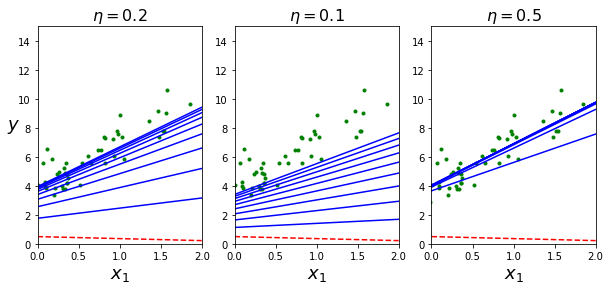

In [229]:
# intialize list to contail all thetas updated
thetas_pathes_bgd = []

def batch_gradient_decent(iterations, thetas, eta):
    # plot the dispertion of data
    plt.plot(X,y ,"g.")
    for iterate in range(iterations):
        # if number of iteration is less than 10 times
        if iterate <10:
            # preidct ([[0], [2]]) * theta
            predict = X2.dot(thetas)
            # shoe plot line if iterate less that 0
            style = "b-" if iterate > 0 else "r--"
            plt.plot(newX, predict, style)
        # equation of gradient descent
        # see book for formula
        gradients = 2* XO.T.dot(XO.dot(thetas) - y) / m
        # partial detavative to go to next theta
        thetas = thetas - eta * gradients
        # append all updated thetas
        thetas_pathes_bgd.append(thetas)
        
    plt.axis([0, 2, 0, 15])
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
#     return thetas_pathes

# fixed randomized
np.random.seed(42)
# random thetas contain (2, 1) vector
thetas = np.random.randn(2,1)
# learning_rate
eta = 0.5

# p = batch_gradient_decent(number_iterartions, thetas, eta)
plt.figure(figsize=(10,4))
plt.subplot(131); batch_gradient_decent(1000, thetas, eta=0.2)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); batch_gradient_decent(1000, thetas, eta=0.1)
plt.subplot(133); batch_gradient_decent(1000, thetas, eta=0.5)

## Stochastic gradient descent

In [230]:
def learning_schedule(t):
    t0, t1 = 5, 50
    return t0 / (t + t1)

In [231]:
epoch = 50
etas = []
# list of all thetas produced by stochastic gradient descent
thetas_paths_sgd = []

# create random theta by shape (2, 1) vector Gussian distribution
thetas = np.random.rand(2, 1)
def stochastic_gradient_descent(epoches, thetas):
    # iterate through every epoch
    for epoch in range(epoches):
        for i in range(m):
            
            # ploting
            if epoch == 0 and i < 10:
                # predict 20 lines
                prediction = X2.dot(thetas)
                # red line color indicate the first step of 20 lines
                style = "b-" if i > 0 else "r--"
                # plot this line
                plt.plot(newX, prediction, style)
                
            # pick up a random indexes
            ranom_index = np.random.randint(m)
            # pick a single instance based on single random index
            Xi = XO[ranom_index: ranom_index+1]
            # pick a single instance lable based on singel random index
            yi = y[ranom_index: ranom_index+1]
            # minimization by gradient descent
            gradients = 2 * Xi.T.dot(Xi.dot(thetas) - yi)
            # reduce learning rate at a time
            eta = learning_schedule(epoch * m + i)
            etas.append(eta)
            # minimize thetas
            thetas = thetas - eta * gradients
            # sppend all thetas
            thetas_paths_sgd.append(thetas)
            
    return thetas_paths_sgd

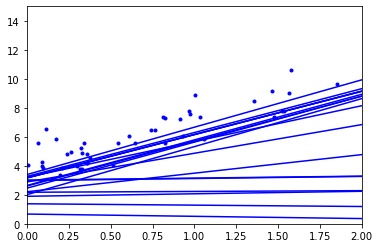

In [232]:
epoches = 50
thetas = np.random.randn(2, 1)
thetas_paths_sgd = stochastic_gradient_descent(epoches, thetas)
stochastic_gradient_descent(epoches, thetas)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Mini-Batch Gradient Descent

In [233]:
X = np.random.randn(100, 1) # create one column feture contain 100 instance random distribution of shape (100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # create label 100 rows of shape (100, 1)
X1s = np.c_[np.ones((100, 1)), X] # create 100 ones on column X of shape (100, 2)
# -------------------------------------------------------------------------------
X_train = np.c_[np.ones((2, 1)), np.array([[0], [2]])] # of shape (2, 2)

In [241]:
# store all thetas
thetas_paths_mgd = []

def learning_rate_schedule(t):
    return 200 / (t + 1000)

def mini_batch_gradinet_descents(eta , thetas, iterations):
    # plot the original data
    plt.plot(X, y, "b.")
    t = 0
    for epoch in range(iterations):
        # shuffiled indexes
        random_indexes = np.random.permutation(len(X))
        # shuffiled instance`s index
        shuffiled_index_X = X1s[random_indexes]
        shuffiled_index_y = y[random_indexes]
        # loop around every epoch 20 instances each time
        for i in range(0, len(X), mini_batch_size):
            # a variable for reduceing learning rate to be smal each time
            t += 1
            
            # show the first instance in red line and the other steps in blue lines
            if epoch == 0:
                y_pred = X_train.dot(thetas)
                sytle = "b-" if i > 0 else "r--"
                plt.plot(X_test, y_pred, sytle)
                
            # got one eopch at a time of 20 instance
            Xi = shuffiled_index_X[i : i + mini_batch_size]
            yi = shuffiled_index_y[i : i + mini_batch_size]
            # define gradient descent formula. 2 * formula / mini batch size
            gradients = 2 * Xi.T.dot(Xi.dot(thetas) - yi) / mini_batch_size
            # reduce eta (i.e learning rate)
            eta = learning_rate_schedule(t * m + i)
            # reduce the amount of theta each time (i.e partial derviative)
            thetas = thetas - eta * gradients
            # store all thetas in a list
            thetas_paths_mgd.append(thetas)
        
        # optimize graphing
        plt.axis([0, 2, 0, 15])
        plt.xlabel("$X_1$", fontsize=15)
        plt.ylabel("$y$", rotation=0, fontsize= 15)
        plt.title("$\eta = {}$".format(eta), fontsize=15)

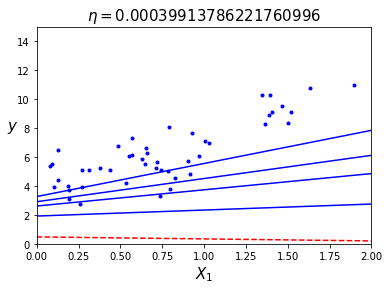

In [242]:
np.random.seed(42)
iterations = 1000
# every random batch instances chose 20 of them
mini_batch_size = 20
# Thetas
thetas = np.random.randn(2, 1)
# create eta (i.e the learning rate)
eta = 0.08

mini_batch_gradinet_descents(eta, thetas, iterations)

In [243]:
thetas_pathes_bgd = np.array(thetas_pathes_bgd)
thetas_paths_sgd = np.array(thetas_paths_sgd)
thetas_paths_mgd = np.array(thetas_paths_mgd)

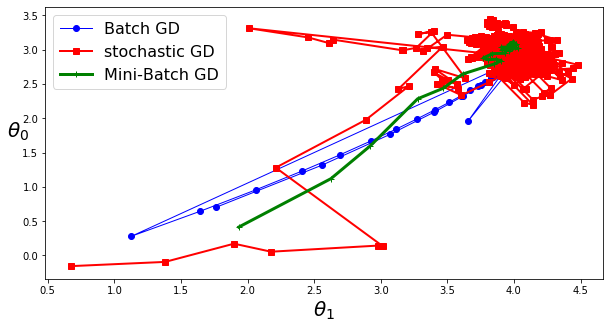

In [297]:
plt.figure(figsize=(10, 5))
plt.plot(thetas_pathes_bgd[:, 0], thetas_pathes_bgd[:, 1], "b-o", linewidth= 1, label='Batch GD')
plt.plot(thetas_paths_sgd[:, 0], thetas_paths_sgd[:, 1], "r-s", linewidth= 2, label='stochastic GD')
plt.plot(thetas_paths_mgd[:, 0], thetas_paths_mgd[:, 1], "g-+", linewidth= 3, label='Mini-Batch GD')
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_1$", fontsize= 20)
plt.ylabel(r"$\theta_0$", fontsize= 20, rotation=0)
# plt.axis([1, 5, -2, 4])
plt.show()